# Основные понятия и примеры прикладных задач

# Используемые пакеты

In [ ]:
# try:
    # import google.colab
    # IN_COLAB = True
# except:
    # IN_COLAB = False

# if IN_COLAB:
    # !wget -q -O requirements.txt 
    # %pip install -q -r requirements.txt

In [2]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ирисы Фишера
Выборка взята отсюда: https://archive.ics.uci.edu/ml/datasets/iris

## Загрузка выборки

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem1/data/iris.csv', 
                      header=None, 
                      names=['длина чашелистика', 'ширина чашелистика', 
                             'длина лепестка', 'ширина лепестка', 'класс'])
dataset.sample(5, random_state=0)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


## Начало работы с данными
1. Определить множество объектов:
    * Определить размер выборки
    * Определить признаки, которыми описываются объекты
2. Определить множество ответов
3. Определить тип задачи машинного обучения
6. ...

### Множество объектов
В данной задачи множество объектов описывается $n=4$ признаками:
1. Длина чашелистика
2. Ширина чашелистика
3. Длина лепестка
4. Ширина лепестка

In [4]:
print('Размер выборки составляет l={} объектов.'.format(len(dataset)))

Размер выборки составляет l=150 объектов.


Все признаки являются вещественными признаками. Формально объекты $\mathbf{X}$ представляються в следующем виде:
$$\mathbf{X} \in \mathbb{R}^{l\times n},$$
где $l$ число объектов, а $n$ число признаков.

Получаем, что $\mathbf{X}$ это некоторая вещественная матрица размера $l\times n$.

### Множество ответов
В данной задаче множество ответов состоит из трех элементов:
1. Iris-virginica
2. Iris-versicolor
3. Iris-setosa

### Задача машинного обучения
В нашем случае, так как мощность множества $|\mathbf{y}|=3 \ll l=150$ получаем задачу классификации на $M=3$ класса.

## Анализ данных
Сначала проэктируем все объекты на двумерные плоскости, для упрощения анализа

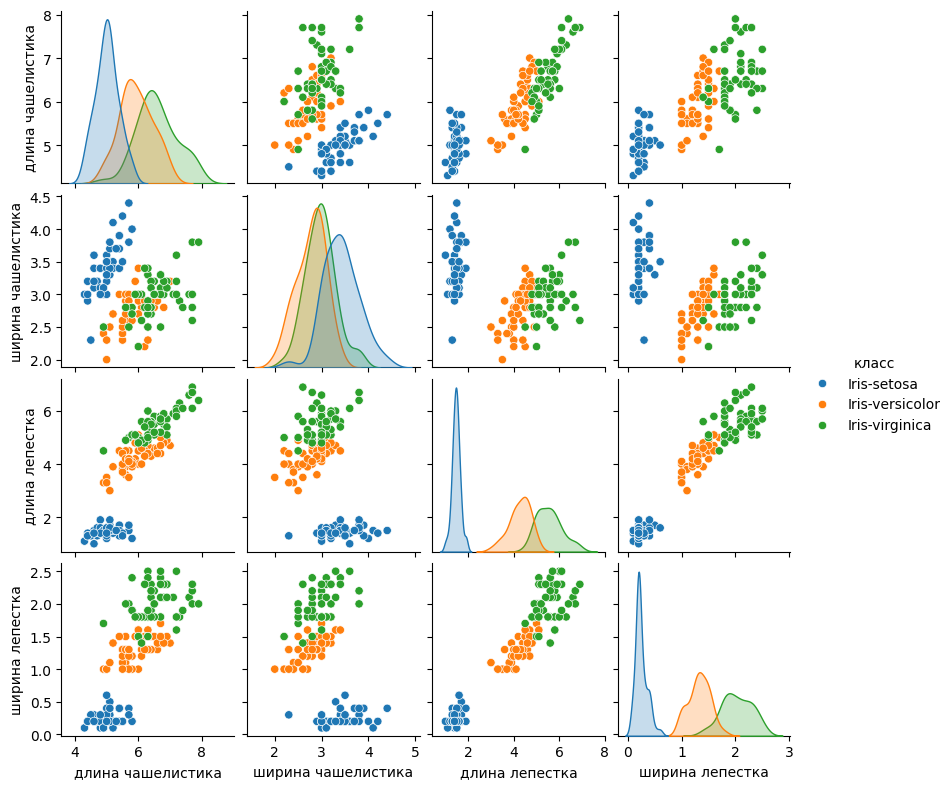

In [5]:
sns.pairplot(dataset, hue='класс', height=2)
plt.show()

Из рисунка видно, что класс синих точек (Iris-setosa) легко отделяется от двух других цветов. Оранджевые и зеленные точки отделяются не так просто в каждой из проэкций, но все равно можно провести прямую, которая отделит оранджевые точки от зеленых.

## Построение модели
### Преобразование данных
Как было сказано ранее нам требуется решить задачу классификации на 3 класса. Но для наглядноси рассмотрим бинарную классификацию (классификацию на несколько классов рассмотрим в следующей лекции).

Чтобы исходную задачу преобразовать в задачу бинарной классификации уберем из выборки все объекта класса Iris-setosa.

In [8]:
# Создаем копию датасета без класса Iris-setosa
binary_dataset = dataset[dataset['класс'] != 'Iris-setosa'].copy()

# Преобразуем классы в числовые значения
binary_dataset['класс'] = binary_dataset['класс'].map({
    'Iris-versicolor': -1,
    'Iris-virginica': 1
})

# Проверим результат
print(binary_dataset['класс'].value_counts())
print(binary_dataset.head())

класс
-1    50
 1    50
Name: count, dtype: int64
    длина чашелистика  ширина чашелистика  длина лепестка  ширина лепестка  \
50                7.0                 3.2             4.7              1.4   
51                6.4                 3.2             4.5              1.5   
52                6.9                 3.1             4.9              1.5   
53                5.5                 2.3             4.0              1.3   
54                6.5                 2.8             4.6              1.5   

    класс  
50     -1  
51     -1  
52     -1  
53     -1  
54     -1  


Классы закодируем целыми числами $-1$ и $1$.

In [9]:
binary_dataset.loc[dataset['класс'] == 'Iris-versicolor', dataset.columns == 'класс'] = -1
binary_dataset.loc[dataset['класс'] == 'Iris-virginica', dataset.columns == 'класс'] = 1

Получаем задачу бинарной классификации.

### Модель алгоритмов

Модель алгоритмов $\mathfrak{F}$ в машинном обучении это некоторое множество функций, которые действуют из множества объектов в множество ответов, в нашем случае:
$$\mathfrak{F} = \{f| f: \mathbb{R}^n \to \{-1, 1\}, \text{еще какие-то ограничения}\},$$
обычно $\mathfrak{F}$ это некоторое параметрическое семество функций, тоесть разные функции $f$ отличаются друг от друга только каким-то параметром. Простым примером параметрическим семейством функций для задачи бинарной классификации является семейство линейный классификатор:
$$\mathfrak{F}_{bcl} = \left\{f\bigr(\theta, \mathbf{x}\bigr)=\text{sign}\bigr(\theta^{\mathsf{T}}\mathbf{x}\bigr)\bigr| \theta \in \mathbb{R}^{n} \right\}.$$


### Функция потерь

Машиное обучение это всегда выбор функции из множества $\mathfrak{F}$. Чтобы выбрать функцию, нужен некоторый критерий по которому она выбирается, то есть нужно упоррядочить все функции от худшей к лучшей. Для этого построем функционал $\mathcal{L}$, который каждой функции $f \in \mathfrak{F}$ ставит в соответствии число из $\mathbb{R}_+$. В машинном обучении обычно функционал качества водиться как некоторая ошибка на выборке. В общем виде функционал качества можно представить в следующем виде:
$$\mathcal{L}\bigr(f, \mathbf{X}, \mathbf{y}\bigr) = \sum_{i=1}^l\mathcal{q}\bigr(f, \mathbf{x}_i, y_i\bigr),$$
где $q$ некоторая функция ошибки на некотором объекте $\mathbf{x}$. Функционал качества $\mathcal{L}$ называется эмперическим риском.

### Оптимизационная задача

Далее нужно поставить задачу оптимизации для выбора $f \in \mathfrak{F}$. Здесь все просто, просто минимизируем эмперический риск:
$$\hat{f} = \arg \min_{f \in \mathfrak{F}} \mathcal{L}\bigr(f, \mathbf{X}, \mathbf{y}\bigr).$$

Важно! В результе функция $\hat{f}$ зависит от выборки $\left(\mathbf{X}, \mathbf{y}\right)$, то есть для разных наборов данных оптимальная функция будет различная.

Вернемся к нашей задаче. В нашем случае функционал качества будет иметь следующий вид:
$$\mathcal{L}\bigr(\theta, \mathbf{X}, \mathbf{y}\bigr) = \sum_{i=1}^l\bigr[f\bigr(\theta, \mathbf{x}_i\bigr) \not= y_i\bigr],$$
и оптимизационная задача переписывается в виде:
$$\hat{\theta} = \arg \min_{\theta \in \mathbb{R}^n} \sum_{i=1}^l\bigr[f\bigr(\theta, \mathbf{x}_i\bigr) \not= y_i\bigr].$$

И на самом деле в дальнейшем будем решать иммено такие задачи, на поиск оптимального параметра. Само решение задачи линейной бинарной классификации будет на следующей лекции. Сейчас используемся библиотеками для решения данной задачи. Далее в примере будет найден параметр $\hat{\theta}$ не как решение непосредственно этой оптимизационной задачи, а немного измененной, но об этом позже в следующей лекции.

### Поиск оптимального вектора параметров
Перейдем к двум матрицам:
1. Матрице объектов $\mathbf{X} \in \mathbb{R}^{l\times (n+1)}$
2. Вектору ответов $\mathbf{y} \in \{-1,1\}^l$

Заметим, что объекты мы погрузили в пространство более большой размерности, добавив еще один признак, который у всех объектов будет равен $1$.

In [10]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'класс'].values
y = binary_dataset.iloc[:, binary_dataset.columns == 'класс'].values.reshape(-1)
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.int64)

In [11]:
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, y)

Получаем вектор оптимальных параметров $\hat{\theta}$

In [12]:
model.coef_

array([[-3.94857799e-01, -5.12236925e-01,  2.93150207e+00,
         2.41616121e+00, -1.17463494e-03]])

Загрузите файл winequality-red.csv (с помощью pd.read_csv).

Последний столбец отвечает за качество вина. Будем считать, что хорошее вино начинается с цифры 7 и выше. 
Остальное вино будем счиатать некачественным.

Сделайте классификацию вина по данному датасету. Два класса "Хорошее" и "Не качественное". 
Результатом будем считать уравнение гиперповерхности на гиперпространстве параметров, отделяющее один класс от другого. 


Распределение классов:
quality_binary
-1    1382
 1     217
Name: count, dtype: int64
Хорошее вино (1): 217
Некачественное вино (-1): 1382

Коэффициенты модели:
fixed acidity: 0.079176
volatile acidity: -2.615343
citric acid: 0.267063
residual sugar: 0.102131
chlorides: -1.296174
free sulfur dioxide: 0.012494
total sulfur dioxide: -0.015088
density: -0.112664
pH: -0.595040
sulphates: 2.462509
alcohol: 1.009735
Свободный член: -0.075690
УРАВНЕНИЕ РАЗДЕЛЯЮЩЕЙ ГИПЕРПОВЕРХНОСТИ:

0.079176 × fixed acidity -2.615343 × volatile acidity +0.267063 × citric acid +0.102131 × residual sugar -1.296174 × chlorides +0.012494 × free sulfur dioxide -0.015088 × total sulfur dioxide -0.112664 × density -0.595040 × pH +2.462509 × sulphates +1.009735 × alcohol -0.075690 = 0

Где:
- Если значение выражения > 0, то вино классифицируется как ХОРОШЕЕ
- Если значение выражения < 0, то вино классифицируется как НЕКАЧЕСТВЕННОЕ

ОЦЕНКА КАЧЕСТВА МОДЕЛИ:
Точность модели на обучающих данных: 0.882

Матрица ошибок:
 

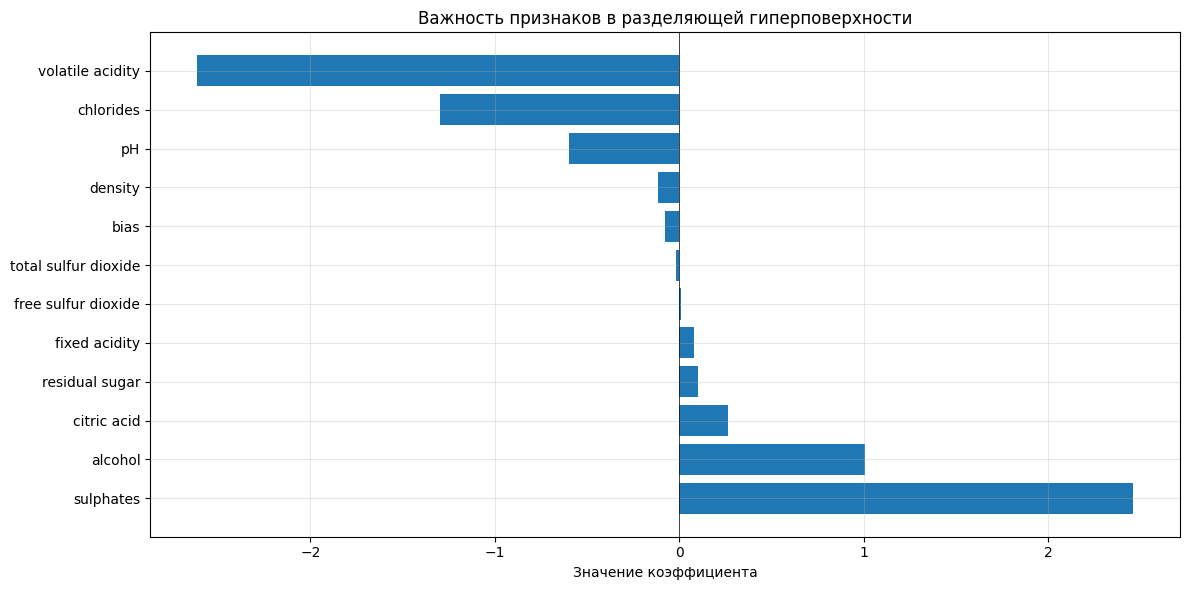

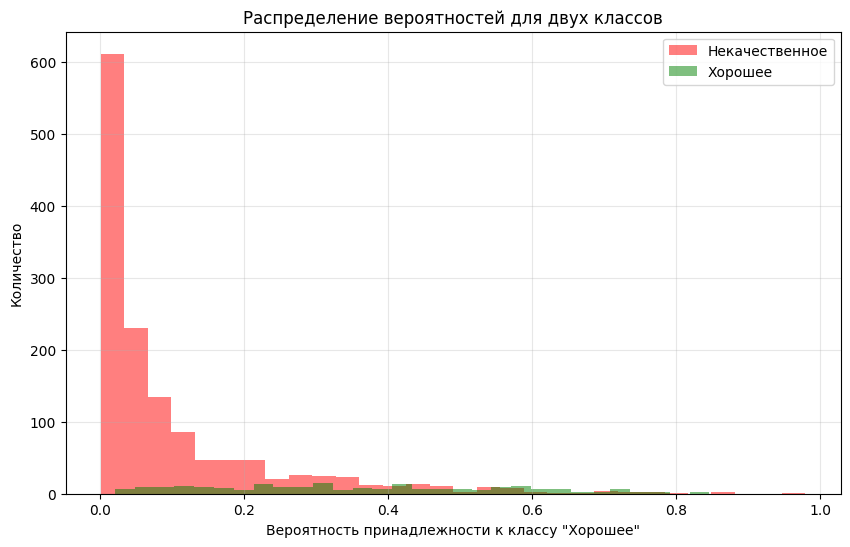

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
df = pd.read_csv('winequality-red.csv')

# Создаем бинарную целевую переменную
# Хорошее вино (quality >= 7) -> 1, Некачественное (quality < 7) -> -1
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else -1)

print(f"\nРаспределение классов:")
print(df['quality_binary'].value_counts())
print(f"Хорошее вино (1): {df[df['quality_binary'] == 1].shape[0]}")
print(f"Некачественное вино (-1): {df[df['quality_binary'] == -1].shape[0]}")

# Подготовка данных
# Все признаки, кроме 'quality' и 'quality_binary'
feature_columns = [col for col in df.columns if col not in ['quality', 'quality_binary']]
X = df[feature_columns].values
y = df['quality_binary'].values

# Добавляем единичный столбец для свободного члена (bias term)
X_with_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# Обучаем модель логистической регрессии
model = LogisticRegression(random_state=42, max_iter=2000)
model.fit(X_with_bias, y)

# Получаем коэффициенты
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print(f"\nКоэффициенты модели:")
for i, col in enumerate(feature_columns):
    print(f"{col}: {coefficients[i]:.6f}")
print(f"Свободный член: {coefficients[-1]:.6f}")

print("УРАВНЕНИЕ РАЗДЕЛЯЮЩЕЙ ГИПЕРПОВЕРХНОСТИ:")

equation_parts = []
for i, col in enumerate(feature_columns):
    coef = coefficients[i]
    if coef != 0:
        sign = "+" if coef > 0 and i > 0 else ""
        equation_parts.append(f"{sign}{coef:.6f} × {col}")

# Добавляем свободный член
if coefficients[-1] != 0:
    sign = "+" if coefficients[-1] > 0 else ""
    equation_parts.append(f"{sign}{coefficients[-1]:.6f}")

equation = " ".join(equation_parts) + " = 0"
print(f"\n{equation}")
print("\nГде:")
print("- Если значение выражения > 0, то вино классифицируется как ХОРОШЕЕ")
print("- Если значение выражения < 0, то вино классифицируется как НЕКАЧЕСТВЕННОЕ")

# Оценка качества модели
y_pred = model.predict(X_with_bias)

print(f"\n" + "="*60)
print("ОЦЕНКА КАЧЕСТВА МОДЕЛИ:")
print("="*60)
print(f"Точность модели на обучающих данных: {model.score(X_with_bias, y):.3f}")

print(f"\nМатрица ошибок:")
cm = confusion_matrix(y, y_pred)
print(pd.DataFrame(cm, 
                   index=['Факт: Некачественное', 'Факт: Хорошее'],
                   columns=['Прогноз: Некачественное', 'Прогноз: Хорошее']))

print(f"\nДетальный отчет по классификации:")
print(classification_report(y, y_pred, target_names=['Некачественное', 'Хорошее']))

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
coefficients_df = pd.DataFrame({
    'Признак': feature_columns + ['bias'],
    'Коэффициент': coefficients
})
coefficients_df = coefficients_df.sort_values('Коэффициент', ascending=False)

plt.barh(coefficients_df['Признак'], coefficients_df['Коэффициент'])
plt.xlabel('Значение коэффициента')
plt.title('Важность признаков в разделяющей гиперповерхности')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Визуализация распределения вероятностей
probabilities = model.predict_proba(X_with_bias)[:, 1]
plt.figure(figsize=(10, 6))
plt.hist(probabilities[y == -1], bins=30, alpha=0.5, label='Некачественное', color='red')
plt.hist(probabilities[y == 1], bins=30, alpha=0.5, label='Хорошее', color='green')
plt.xlabel('Вероятность принадлежности к классу "Хорошее"')
plt.ylabel('Количество')
plt.title('Распределение вероятностей для двух классов')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()